In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import model_summary
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('S8/util.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cuda


In [5]:
train_loader ,  test_loader  = load_data()


Files already downloaded and verified
Files already downloaded and verified


In [38]:
class S8_Model_BN(nn.Module):
    def __init__(self):
        super(S8_Model_BN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=48, kernel_size=7, padding=3, bias=False), 
            nn.BatchNorm2d(48),
            nn.ReLU(),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=3,bias=False),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
        )
        self.conv1x1_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1),  
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        self.pool_1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=8, kernel_size=3, bias=False),  
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3,bias=False),  
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3,bias=False),  
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )
        self.conv1x1_7 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        self.pool_2 = nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.conv8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,bias=False),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
        )
        self.conv9 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=1,bias=False),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.conv10 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=1,bias=False),  
            nn.BatchNorm2d(64),
        )
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.conv1x1_11 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=10, kernel_size=1))


        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv1x1_3(x)
        x = self.pool_1(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv1x1_7(x)
        x = self.pool_2(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)
        x = self.gap(x)
        x = self.conv1x1_11(x)
        x = x.view(x.size(0), -1)  
        x = F.log_softmax(x, dim=1)
        return x



In [39]:
model = S8_Model_BN().to(device)
model_summary(model,input_size= (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 28, 28]           7,056
       BatchNorm2d-2           [-1, 48, 28, 28]              96
              ReLU-3           [-1, 48, 28, 28]               0
            Conv2d-4           [-1, 64, 26, 26]          27,648
       BatchNorm2d-5           [-1, 64, 26, 26]             128
              ReLU-6           [-1, 64, 26, 26]               0
            Conv2d-7           [-1, 32, 26, 26]           2,080
       BatchNorm2d-8           [-1, 32, 26, 26]              64
              ReLU-9           [-1, 32, 26, 26]               0
        MaxPool2d-10           [-1, 32, 13, 13]               0
           Conv2d-11            [-1, 8, 11, 11]           2,304
      BatchNorm2d-12            [-1, 8, 11, 11]              16
             ReLU-13            [-1, 8, 11, 11]               0
           Conv2d-14              [-1, 

In [47]:

optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,dampening=0,weight_decay=0,nesterov=False)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=0.8090 Batch_id=781 Accuracy=65.53: 100%|██████████| 782/782 [00:20<00:00, 38.43it/s]


Test set: Average loss: 0.0162, Accuracy: 6341/10000 (63.41%)

Epoch 2


Train: Loss=1.7815 Batch_id=781 Accuracy=66.95: 100%|██████████| 782/782 [00:20<00:00, 39.08it/s]


Test set: Average loss: 0.0169, Accuracy: 6194/10000 (61.94%)

Epoch 3


Train: Loss=1.1127 Batch_id=781 Accuracy=67.59: 100%|██████████| 782/782 [00:21<00:00, 36.07it/s]


Test set: Average loss: 0.0151, Accuracy: 6607/10000 (66.07%)

Epoch 4


Train: Loss=1.7196 Batch_id=781 Accuracy=68.32: 100%|██████████| 782/782 [00:22<00:00, 34.00it/s]


Test set: Average loss: 0.0158, Accuracy: 6388/10000 (63.88%)

Epoch 5


Train: Loss=1.4105 Batch_id=781 Accuracy=68.96: 100%|██████████| 782/782 [00:23<00:00, 33.34it/s]


Test set: Average loss: 0.0170, Accuracy: 6176/10000 (61.76%)

Epoch 6


Train: Loss=0.6238 Batch_id=781 Accuracy=72.73: 100%|██████████| 782/782 [00:21<00:00, 35.69it/s]


Test set: Average loss: 0.0140, Accuracy: 6801/10000 (68.01%)

Epoch 7


Train: Loss=0.7689 Batch_id=781 Accuracy=73.57: 100%|██████████| 782/782 [00:21<00:00, 35.81it/s]


Test set: Average loss: 0.0141, Accuracy: 6783/10000 (67.83%)

Epoch 8


Train: Loss=0.7900 Batch_id=781 Accuracy=74.09: 100%|██████████| 782/782 [00:21<00:00, 36.23it/s]


Test set: Average loss: 0.0140, Accuracy: 6806/10000 (68.06%)

Epoch 9


Train: Loss=1.0598 Batch_id=781 Accuracy=74.32: 100%|██████████| 782/782 [00:21<00:00, 35.95it/s]


Test set: Average loss: 0.0142, Accuracy: 6760/10000 (67.60%)

Epoch 10


Train: Loss=0.4574 Batch_id=781 Accuracy=74.78: 100%|██████████| 782/782 [00:21<00:00, 35.59it/s]


Test set: Average loss: 0.0143, Accuracy: 6757/10000 (67.57%)

Epoch 11


Train: Loss=0.4176 Batch_id=781 Accuracy=75.13: 100%|██████████| 782/782 [00:22<00:00, 34.79it/s]


Test set: Average loss: 0.0139, Accuracy: 6816/10000 (68.16%)

Epoch 12


Train: Loss=1.2825 Batch_id=781 Accuracy=75.33: 100%|██████████| 782/782 [00:23<00:00, 33.10it/s]


Test set: Average loss: 0.0137, Accuracy: 6912/10000 (69.12%)

Epoch 13


Train: Loss=0.5422 Batch_id=781 Accuracy=75.47: 100%|██████████| 782/782 [00:22<00:00, 34.09it/s]


Test set: Average loss: 0.0139, Accuracy: 6862/10000 (68.62%)

Epoch 14


Train: Loss=1.4008 Batch_id=781 Accuracy=75.39: 100%|██████████| 782/782 [00:22<00:00, 34.31it/s]


Test set: Average loss: 0.0139, Accuracy: 6855/10000 (68.55%)

Epoch 15


Train: Loss=0.3793 Batch_id=781 Accuracy=75.47: 100%|██████████| 782/782 [00:21<00:00, 35.83it/s]


Test set: Average loss: 0.0140, Accuracy: 6840/10000 (68.40%)

Epoch 16


Train: Loss=0.7899 Batch_id=781 Accuracy=75.72: 100%|██████████| 782/782 [00:21<00:00, 36.82it/s]


Test set: Average loss: 0.0141, Accuracy: 6805/10000 (68.05%)

Epoch 17


Train: Loss=0.8256 Batch_id=781 Accuracy=75.56: 100%|██████████| 782/782 [00:21<00:00, 36.60it/s]


Test set: Average loss: 0.0137, Accuracy: 6879/10000 (68.79%)

Epoch 18


Train: Loss=0.5818 Batch_id=781 Accuracy=75.60: 100%|██████████| 782/782 [00:21<00:00, 36.84it/s]


Test set: Average loss: 0.0139, Accuracy: 6845/10000 (68.45%)

Epoch 19


Train: Loss=0.9286 Batch_id=781 Accuracy=75.53: 100%|██████████| 782/782 [00:22<00:00, 35.04it/s]


Test set: Average loss: 0.0141, Accuracy: 6809/10000 (68.09%)

Epoch 20


Train: Loss=0.8669 Batch_id=781 Accuracy=75.55: 100%|██████████| 782/782 [00:22<00:00, 34.03it/s]


Test set: Average loss: 0.0139, Accuracy: 6862/10000 (68.62%)



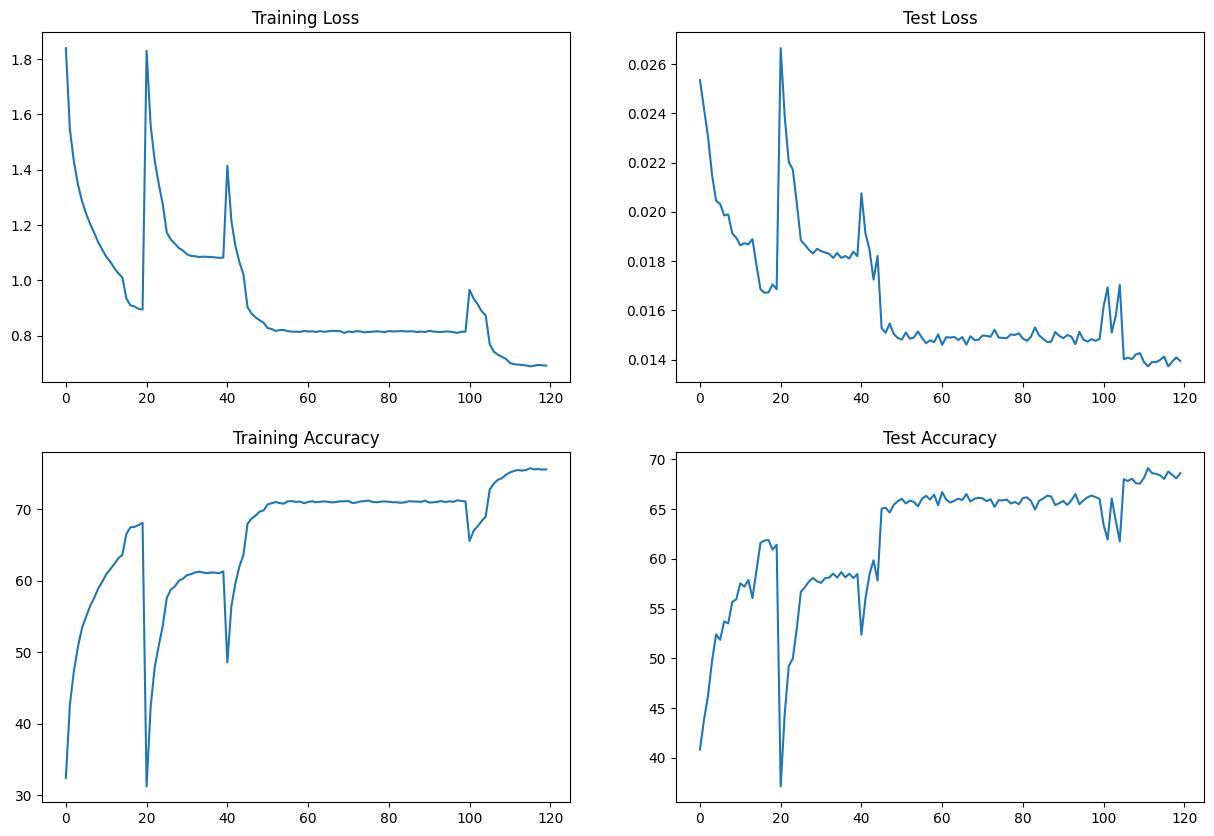

In [48]:
plot_acc_loss()

In [50]:
optimizer_adam = optim.Adam(model.parameters(), lr=1e-4,weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer_adam, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_adam,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=1.0868 Batch_id=781 Accuracy=75.20: 100%|██████████| 782/782 [00:20<00:00, 37.80it/s]


Test set: Average loss: 0.0138, Accuracy: 6876/10000 (68.76%)

Epoch 2


Train: Loss=0.7566 Batch_id=781 Accuracy=75.40: 100%|██████████| 782/782 [00:35<00:00, 21.80it/s]


Test set: Average loss: 0.0140, Accuracy: 6804/10000 (68.04%)

Epoch 3


Train: Loss=0.8289 Batch_id=781 Accuracy=75.37: 100%|██████████| 782/782 [00:32<00:00, 23.84it/s]


Test set: Average loss: 0.0138, Accuracy: 6871/10000 (68.71%)

Epoch 4


Train: Loss=1.5106 Batch_id=781 Accuracy=75.52: 100%|██████████| 782/782 [00:33<00:00, 23.45it/s]


Test set: Average loss: 0.0143, Accuracy: 6806/10000 (68.06%)

Epoch 5


Train: Loss=0.8408 Batch_id=781 Accuracy=75.89: 100%|██████████| 782/782 [00:36<00:00, 21.55it/s]


Test set: Average loss: 0.0141, Accuracy: 6833/10000 (68.33%)

Epoch 6


Train: Loss=1.2330 Batch_id=781 Accuracy=76.24: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


Test set: Average loss: 0.0143, Accuracy: 6778/10000 (67.78%)

Epoch 7


Train: Loss=0.6733 Batch_id=781 Accuracy=76.30: 100%|██████████| 782/782 [00:40<00:00, 19.15it/s]


Test set: Average loss: 0.0139, Accuracy: 6867/10000 (68.67%)

Epoch 8


Train: Loss=1.6055 Batch_id=781 Accuracy=76.27: 100%|██████████| 782/782 [00:38<00:00, 20.36it/s]


Test set: Average loss: 0.0141, Accuracy: 6785/10000 (67.85%)

Epoch 9


Train: Loss=1.0052 Batch_id=781 Accuracy=76.51: 100%|██████████| 782/782 [00:39<00:00, 19.56it/s]


Test set: Average loss: 0.0141, Accuracy: 6829/10000 (68.29%)

Epoch 10


Train: Loss=0.6941 Batch_id=781 Accuracy=76.38: 100%|██████████| 782/782 [00:41<00:00, 18.62it/s]


Test set: Average loss: 0.0140, Accuracy: 6826/10000 (68.26%)

Epoch 11


Train: Loss=0.3887 Batch_id=781 Accuracy=76.50: 100%|██████████| 782/782 [00:42<00:00, 18.41it/s]


Test set: Average loss: 0.0138, Accuracy: 6891/10000 (68.91%)

Epoch 12


Train: Loss=1.4041 Batch_id=781 Accuracy=76.74: 100%|██████████| 782/782 [00:42<00:00, 18.29it/s]


Test set: Average loss: 0.0141, Accuracy: 6837/10000 (68.37%)

Epoch 13


Train: Loss=0.4553 Batch_id=781 Accuracy=76.66: 100%|██████████| 782/782 [00:43<00:00, 18.15it/s]


Test set: Average loss: 0.0140, Accuracy: 6834/10000 (68.34%)

Epoch 14


Train: Loss=0.8060 Batch_id=781 Accuracy=76.45: 100%|██████████| 782/782 [00:43<00:00, 17.79it/s]


Test set: Average loss: 0.0142, Accuracy: 6788/10000 (67.88%)

Epoch 15


Train: Loss=0.8371 Batch_id=781 Accuracy=76.46: 100%|██████████| 782/782 [00:44<00:00, 17.75it/s]


Test set: Average loss: 0.0143, Accuracy: 6801/10000 (68.01%)

Epoch 16


Train: Loss=1.5911 Batch_id=781 Accuracy=76.54: 100%|██████████| 782/782 [00:45<00:00, 17.30it/s]


Test set: Average loss: 0.0141, Accuracy: 6825/10000 (68.25%)

Epoch 17


Train: Loss=0.9124 Batch_id=781 Accuracy=76.62: 100%|██████████| 782/782 [00:45<00:00, 17.10it/s]


Test set: Average loss: 0.0144, Accuracy: 6767/10000 (67.67%)

Epoch 18


Train: Loss=1.1708 Batch_id=781 Accuracy=76.64: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]


Test set: Average loss: 0.0139, Accuracy: 6843/10000 (68.43%)

Epoch 19


Train: Loss=1.1491 Batch_id=781 Accuracy=76.63: 100%|██████████| 782/782 [00:37<00:00, 21.11it/s]


Test set: Average loss: 0.0142, Accuracy: 6825/10000 (68.25%)

Epoch 20


Train: Loss=0.5375 Batch_id=781 Accuracy=76.55: 100%|██████████| 782/782 [00:37<00:00, 21.11it/s]


Test set: Average loss: 0.0143, Accuracy: 6812/10000 (68.12%)



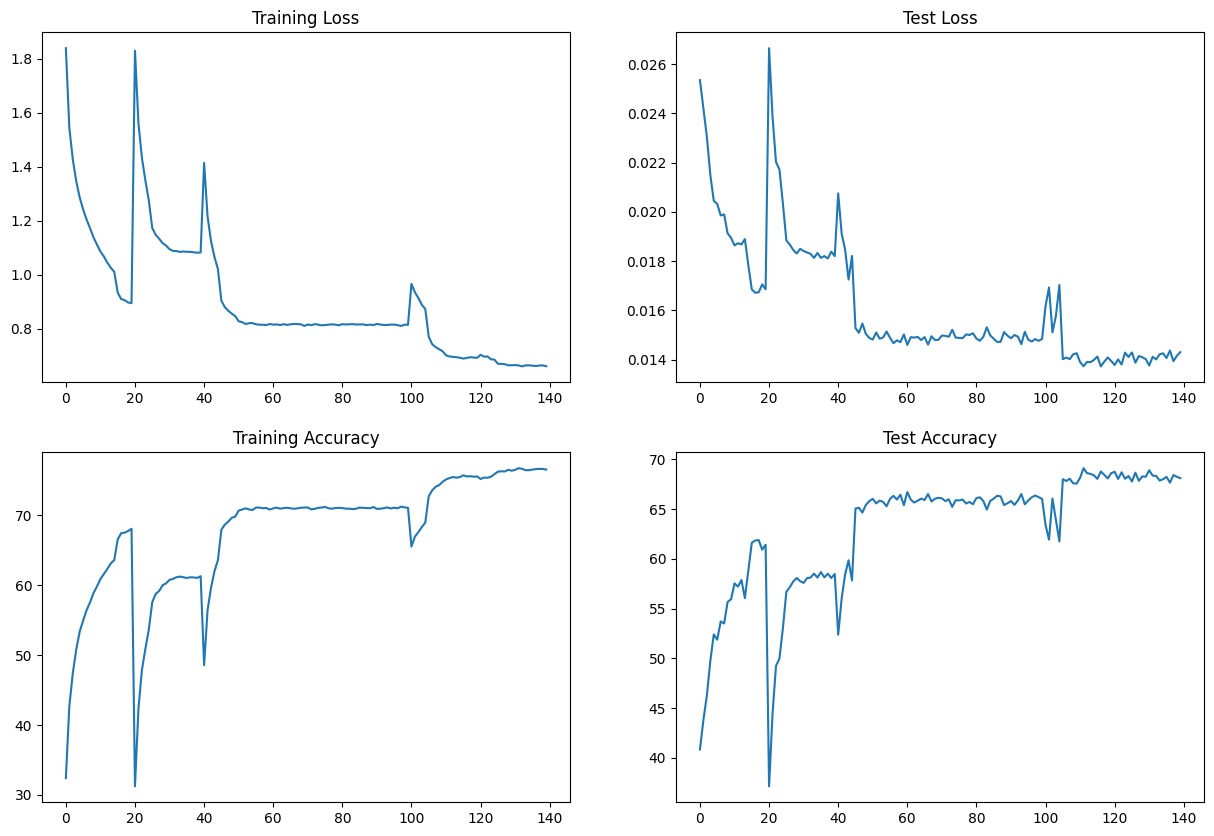

In [51]:
plot_acc_loss()